### Create peat bog geojson files for Ireland 2000 and 2012

Use Shapefiles derived from Corine data to create geojson files for Ireland only

This will need repeating for both files 2000 and 2012

In [1]:
import geopandas as gpd
import json

In [2]:
# load bog shapefile (derived from corine data)
# run with both layer options

## filename for 2000
#layer = "U2006_CLC2000_V2020_20u1"

# filename for 2012
layer = "U2018_CLC2012_V2020_20u1"

datafile = f"{layer.lower()}_geoPackage/DATA/{layer}.gpkg"
data = gpd.read_file(datafile, layer=layer)
data.head(4)

,Code_12,Remark,Area_Ha,ID,geometry
0,111,NaN,130.863710,EU-1,"MULTIPOLYGON (((1917182.160 943608.860, 191714..."
1,111,NaN,53.744481,EU-2,"MULTIPOLYGON (((1953122.840 950507.440, 195311..."
2,111,NaN,30.718986,EU-3,"MULTIPOLYGON (((1956709.150 951094.550, 195669..."
3,111,NaN,50.201676,EU-4,"MULTIPOLYGON (((1805587.500 950821.540, 180555..."


In [4]:
#code = "code_00"
code = "Code_12"

peat_bogs = data[data[code] == "412"]
peat_bogs

,Code_12,Remark,Area_Ha,ID,geometry
121961,412,NaN,42.963089,EU-121962,"MULTIPOLYGON (((1207180.090 2522967.650, 12070..."
121962,412,NaN,26.847371,EU-121963,"MULTIPOLYGON (((1209097.840 2523219.360, 12090..."
121963,412,NaN,123.722240,EU-121964,"MULTIPOLYGON (((1207882.350 2523989.960, 12078..."
121964,412,NaN,26.777663,EU-121965,"MULTIPOLYGON (((1210451.310 2525905.130, 12103..."
121965,412,NaN,115.411280,EU-121966,"MULTIPOLYGON (((1205814.750 2526135.960, 12058..."
...,...,...,...,...,...
2380778,412,NaN,347.790407,EU-2380779,"MULTIPOLYGON (((4958140.690 5268773.190, 49581..."
2380779,412,NaN,165.381216,EU-2380780,"MULTIPOLYGON (((4958035.770 5288156.700, 49579..."
2380780,412,NaN,81.377309,EU-2380781,"MULTIPOLYGON (((4956136.080 5366225.290, 49560..."
2380781,412,NaN,48.319837,EU-2380782,"MULTIPOLYGON (((4957495.820 5406124.880, 49575..."


<Axes: >

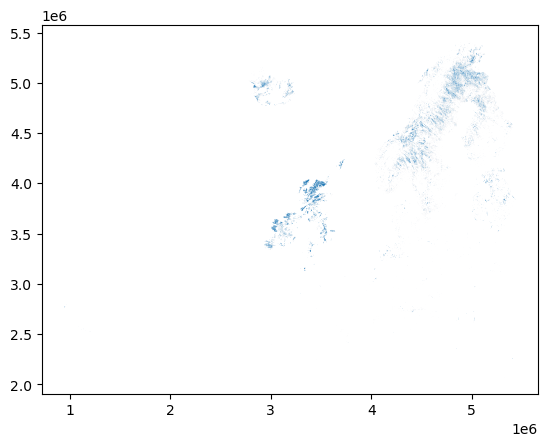

In [5]:
# European bogland
peat_bogs.plot()

In [6]:
# save progress
peat_bogs.to_file('peat_bogs_2012.shp')

#### Clip data to Ireland

In [7]:
# load country outlines (natural earth)
countries = gpd.read_file("ne_10m_admin_0_map_subunits.shp")
countries.head(5)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 map subunit,5,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 map subunit,5,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 map subunit,0,7,Chile,CHL,0,4,Geo subunit,NaN,Chile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 map subunit,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 map subunit,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


<Axes: >

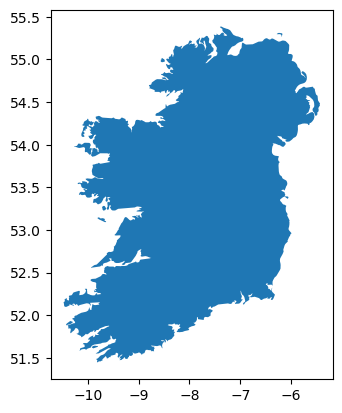

In [8]:
ireland = countries[countries['GEOUNIT'].isin(["Northern Ireland", "Ireland"])]
ireland = ireland.dissolve()
ireland.plot()

<Axes: >

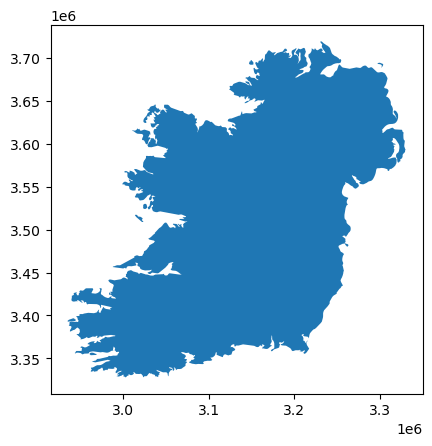

In [9]:
# reproject to match corine data for clipping
merged_ireland = ireland.to_crs('EPSG:3035').dissolve()
merged_ireland.plot()

<Axes: >

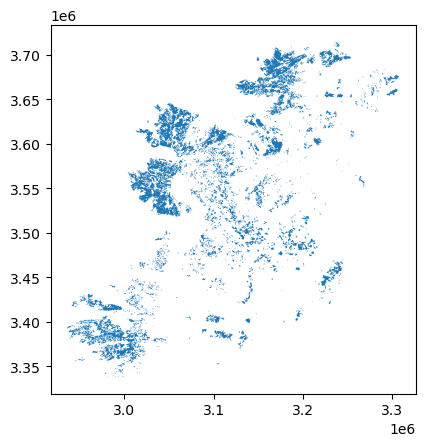

In [10]:
irish_bogs = peat_bogs.clip(merged_ireland)
irish_bogs.plot()

In [11]:
with open("ireland_peat_bogs_2012.geojson", "w") as file:
        data = irish_bogs.to_json(to_wgs84=True)
        json.dump(json.loads(data), file)

<Axes: >

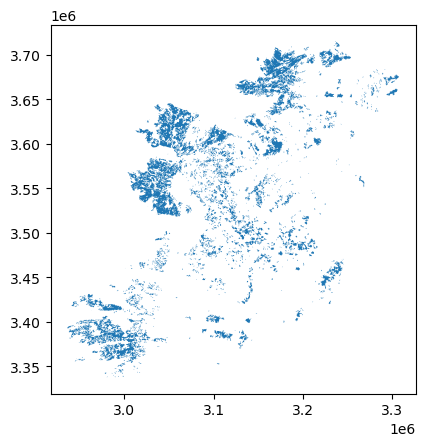

In [12]:
# simplify to reduce file size for web map
irish_bogs['geometry'] = irish_bogs.simplify(3)
irish_bogs.plot()

In [13]:
with open("ireland_peat_bogs_2012_simple.geojson", "w") as file:
        data = irish_bogs.to_json(to_wgs84=True)
        json.dump(json.loads(data), file)